## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  85.449684   799.598858  0.872001  1.950261  1.499008
1  93.820283  1301.816996  0.047713  9.053265  0.597478
2   7.093160  1464.873974  0.974457  9.755188  1.495852
3  23.674613   318.846767  0.197608  3.566424  1.316631
4  82.945099   326.619899  0.704134  6.627531  1.256226


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9314435	total: 68.5ms	remaining: 1m 8s
1:	learn: 0.9242021	total: 69ms	remaining: 34.4s
2:	learn: 0.9178946	total: 69.5ms	remaining: 23.1s
3:	learn: 0.9082723	total: 70ms	remaining: 17.4s
4:	learn: 0.8995487	total: 70.3ms	remaining: 14s
5:	learn: 0.8922399	total: 70.8ms	remaining: 11.7s
6:	learn: 0.8859211	total: 71.2ms	remaining: 10.1s
7:	learn: 0.8780720	total: 71.7ms	remaining: 8.88s
8:	learn: 0.8698363	total: 72.2ms	remaining: 7.95s
9:	learn: 0.8630441	total: 72.6ms	remaining: 7.19s
10:	learn: 0.8579564	total: 73.1ms	remaining: 6.57s
11:	learn: 0.8495459	total: 73.6ms	remaining: 6.06s
12:	learn: 0.8438429	total: 74ms	remaining: 5.62s
13:	learn: 0.8354936	total: 74.4ms	remaining: 5.24s
14:	learn: 0.8287810	total: 74.9ms	remaining: 4.92s
15:	learn: 0.8234653	total: 75.3ms	remaining: 4.63s
16:	learn: 0.8171871	total: 75.8ms	remaining: 4.38s
17:	learn: 0.8112398	total: 76.2ms	remaining: 4.16s
18:	learn: 0.8054736	total: 76.7ms	remaining: 3.96s


85:	learn: 0.5012042	total: 106ms	remaining: 1.12s
86:	learn: 0.4987335	total: 106ms	remaining: 1.11s
87:	learn: 0.4957543	total: 107ms	remaining: 1.11s
88:	learn: 0.4928109	total: 107ms	remaining: 1.1s
89:	learn: 0.4900520	total: 108ms	remaining: 1.09s
90:	learn: 0.4872049	total: 108ms	remaining: 1.08s
91:	learn: 0.4846564	total: 109ms	remaining: 1.07s
92:	learn: 0.4812682	total: 109ms	remaining: 1.06s
93:	learn: 0.4787038	total: 109ms	remaining: 1.05s
94:	learn: 0.4760873	total: 110ms	remaining: 1.05s
95:	learn: 0.4732044	total: 110ms	remaining: 1.04s
96:	learn: 0.4706984	total: 111ms	remaining: 1.03s
97:	learn: 0.4672112	total: 111ms	remaining: 1.02s
98:	learn: 0.4645631	total: 111ms	remaining: 1.01s
99:	learn: 0.4619839	total: 112ms	remaining: 1.01s
100:	learn: 0.4590655	total: 112ms	remaining: 999ms
101:	learn: 0.4568762	total: 113ms	remaining: 993ms
102:	learn: 0.4538365	total: 113ms	remaining: 986ms
103:	learn: 0.4514053	total: 114ms	remaining: 980ms
104:	learn: 0.4487239	total:

266:	learn: 0.2200588	total: 188ms	remaining: 515ms
267:	learn: 0.2189392	total: 188ms	remaining: 514ms
268:	learn: 0.2180812	total: 188ms	remaining: 512ms
269:	learn: 0.2172230	total: 189ms	remaining: 511ms
270:	learn: 0.2167870	total: 189ms	remaining: 509ms
271:	learn: 0.2162724	total: 190ms	remaining: 508ms
272:	learn: 0.2159314	total: 190ms	remaining: 507ms
273:	learn: 0.2149699	total: 191ms	remaining: 505ms
274:	learn: 0.2145499	total: 191ms	remaining: 504ms
275:	learn: 0.2137332	total: 192ms	remaining: 503ms
276:	learn: 0.2131893	total: 192ms	remaining: 501ms
277:	learn: 0.2123222	total: 192ms	remaining: 500ms
278:	learn: 0.2118815	total: 193ms	remaining: 498ms
279:	learn: 0.2114919	total: 193ms	remaining: 497ms
280:	learn: 0.2105012	total: 194ms	remaining: 496ms
281:	learn: 0.2095194	total: 194ms	remaining: 494ms
282:	learn: 0.2086580	total: 195ms	remaining: 493ms
283:	learn: 0.2083201	total: 195ms	remaining: 492ms
284:	learn: 0.2074348	total: 195ms	remaining: 490ms
285:	learn: 

488:	learn: 0.1236381	total: 288ms	remaining: 301ms
489:	learn: 0.1233137	total: 289ms	remaining: 301ms
490:	learn: 0.1229321	total: 289ms	remaining: 300ms
491:	learn: 0.1225583	total: 290ms	remaining: 299ms
492:	learn: 0.1222308	total: 290ms	remaining: 298ms
493:	learn: 0.1218635	total: 290ms	remaining: 298ms
494:	learn: 0.1214648	total: 291ms	remaining: 297ms
495:	learn: 0.1211732	total: 291ms	remaining: 296ms
496:	learn: 0.1208297	total: 292ms	remaining: 295ms
497:	learn: 0.1205607	total: 292ms	remaining: 294ms
498:	learn: 0.1202230	total: 293ms	remaining: 294ms
499:	learn: 0.1198905	total: 293ms	remaining: 293ms
500:	learn: 0.1195631	total: 294ms	remaining: 292ms
501:	learn: 0.1192407	total: 294ms	remaining: 292ms
502:	learn: 0.1189233	total: 294ms	remaining: 291ms
503:	learn: 0.1183373	total: 295ms	remaining: 290ms
504:	learn: 0.1180934	total: 295ms	remaining: 289ms
505:	learn: 0.1177828	total: 296ms	remaining: 289ms
506:	learn: 0.1172091	total: 296ms	remaining: 288ms
507:	learn: 

666:	learn: 0.0858660	total: 370ms	remaining: 185ms
667:	learn: 0.0855999	total: 371ms	remaining: 184ms
668:	learn: 0.0854148	total: 371ms	remaining: 184ms
669:	learn: 0.0851122	total: 372ms	remaining: 183ms
670:	learn: 0.0848513	total: 372ms	remaining: 182ms
671:	learn: 0.0848094	total: 373ms	remaining: 182ms
672:	learn: 0.0846918	total: 373ms	remaining: 181ms
673:	learn: 0.0844849	total: 373ms	remaining: 181ms
674:	learn: 0.0843033	total: 374ms	remaining: 180ms
675:	learn: 0.0841240	total: 375ms	remaining: 180ms
676:	learn: 0.0838510	total: 375ms	remaining: 179ms
677:	learn: 0.0836741	total: 376ms	remaining: 178ms
678:	learn: 0.0835208	total: 376ms	remaining: 178ms
679:	learn: 0.0832177	total: 377ms	remaining: 177ms
680:	learn: 0.0829276	total: 377ms	remaining: 177ms
681:	learn: 0.0826754	total: 378ms	remaining: 176ms
682:	learn: 0.0826351	total: 378ms	remaining: 175ms
683:	learn: 0.0823880	total: 378ms	remaining: 175ms
684:	learn: 0.0822068	total: 379ms	remaining: 174ms
685:	learn: 

887:	learn: 0.0509563	total: 471ms	remaining: 59.4ms
888:	learn: 0.0507345	total: 472ms	remaining: 58.9ms
889:	learn: 0.0506705	total: 472ms	remaining: 58.4ms
890:	learn: 0.0506372	total: 473ms	remaining: 57.8ms
891:	learn: 0.0504006	total: 473ms	remaining: 57.3ms
892:	learn: 0.0503075	total: 474ms	remaining: 56.7ms
893:	learn: 0.0502908	total: 474ms	remaining: 56.2ms
894:	learn: 0.0502742	total: 474ms	remaining: 55.7ms
895:	learn: 0.0501826	total: 475ms	remaining: 55.1ms
896:	learn: 0.0501662	total: 475ms	remaining: 54.6ms
897:	learn: 0.0499709	total: 476ms	remaining: 54ms
898:	learn: 0.0498806	total: 476ms	remaining: 53.5ms
899:	learn: 0.0498644	total: 477ms	remaining: 53ms
900:	learn: 0.0496460	total: 477ms	remaining: 52.4ms
901:	learn: 0.0495570	total: 478ms	remaining: 51.9ms
902:	learn: 0.0493661	total: 478ms	remaining: 51.4ms
903:	learn: 0.0493501	total: 478ms	remaining: 50.8ms
904:	learn: 0.0492624	total: 479ms	remaining: 50.3ms
905:	learn: 0.0492466	total: 479ms	remaining: 49.7

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

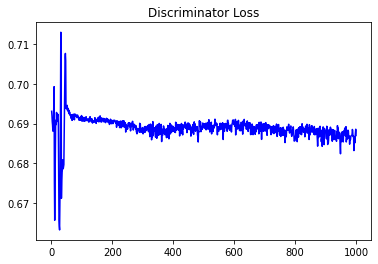

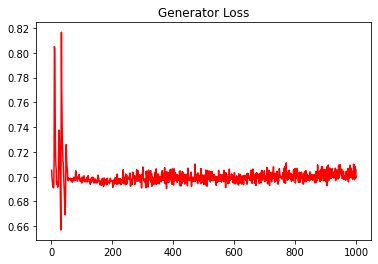

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.6439958107195729


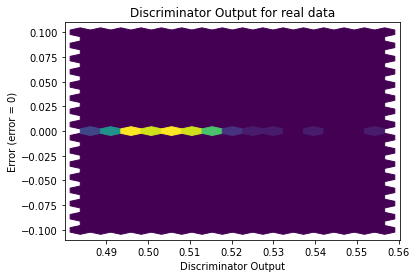

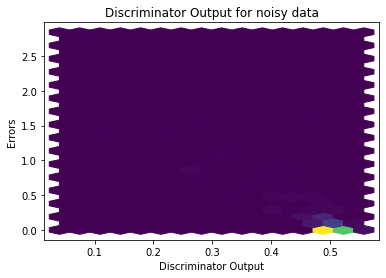

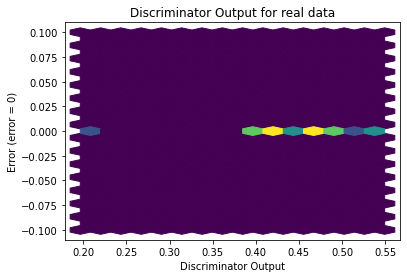

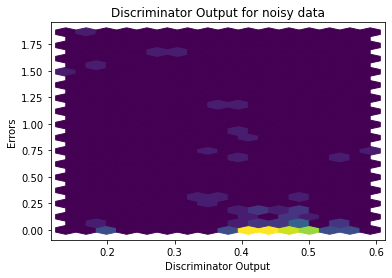

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


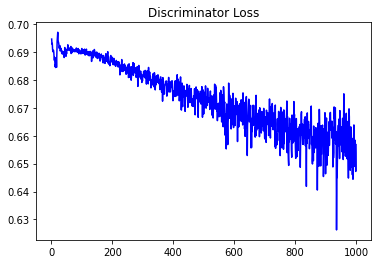

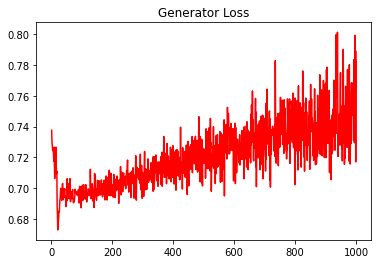

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.35643711107254095


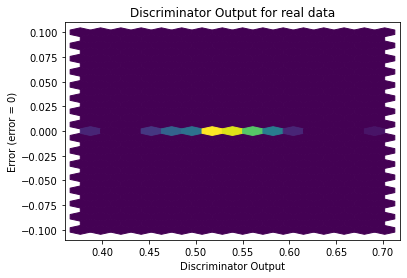

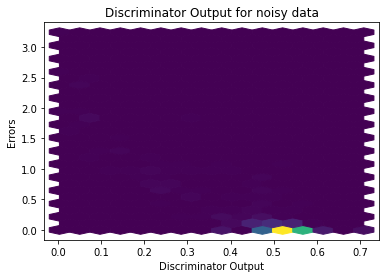

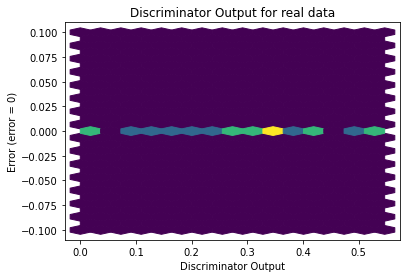

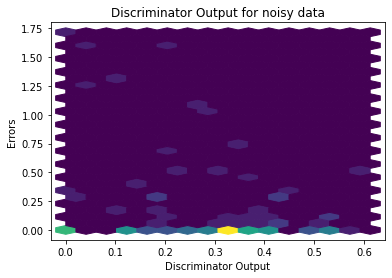

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1301]], requires_grad=True)
